In [71]:
import time
import os
import glob
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm
from PIL import Image

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid

In [73]:
normalize_transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset= torchvision.datasets.CIFAR10(root=',', train= True, 
                                 transform= normalize_transform , download= True)

Files already downloaded and verified


In [74]:
(train_image, train_label)= train_dataset.data, train_dataset.targets

In [6]:
#making a dataframe of train images of CIFAR10
import pandas as pd
df= pd.DataFrame(list(zip(train_dataset.data, train_label)), columns= ['image', 'label'])

In [7]:
#taking a random sample of CIFAR10
sett= df.sample(n=1000, replace= False)

In [8]:
#making a dataframe using these 1000 samples
Sett= pd.DataFrame(sett.values, index= np.arange(0,1000))
Sett.head()

,0,1
0,"[[[211, 190, 147], [212, 190, 146], [208, 187,...",3
1,"[[[246, 255, 248], [246, 250, 241], [149, 140,...",5
2,"[[[89, 83, 55], [77, 72, 44], [99, 94, 66], [1...",0
3,"[[[11, 4, 20], [11, 4, 20], [11, 4, 20], [11, ...",0
4,"[[[105, 115, 127], [103, 113, 125], [108, 117,...",8


I define a function called cartesian to make cartesian products of images. Later, I use it to compute the middle of each two images and then drop the duplicates

In [9]:
def cartesian(*arrays):
    mesh = np.meshgrid(*arrays)  # Standard NumPy meshgrid
    dim = len(mesh)  # Number of dimensions
    elements = mesh[0].size  # Number of elements, any index will do
    flat = np.concatenate(mesh).ravel()  # Flatten the whole meshgrid
    reshape = np.reshape(flat, (dim, elements)).T  # Reshape and transpose
    return reshape

For this simple task, 150 images of CIFAR10 is surely enough. But for harder task, I could use much more data to train the network.
Another reason for using this small set of images is that my cpu is a little weak and even using google colab, I got run time error that buy a new cpu for task when I use the entire images.

I can still make a very good predictig function for all our 1000 samples in the end.

In [10]:
AS= Sett[0]

In [11]:
S= Sett[0][:150]

In [12]:
#making catrtesian product of 150 images
f= cartesian(S, S)
len(f)

22500

In [13]:
#making data frame of theis cartesian so that I have a dataframe of two columns which is 
#the cartesian product of each combination of two images. But, here still have both (A,B), (B,A) in
ourdata= pd.DataFrame(data= f, columns= ('output1', 'output2'))

making data frame of theis cartesian so that I have a dataframe of two columns which is the cartesian product of each combination of two images. But here, we have both (A,B), (B,A) in dataframe that is undesired because it produces duplicates for middle ones. The reason why I am using dataframe is because I want to use drop.duplicates command 

In [14]:
#Here, I flattened the values of this dataframe and computed the middle of two images
A= [ourdata['output1'][i].flatten() for i in range(len(f))]
B= [ourdata['output2'][i].flatten() for i in range(len(f))]
C= [A[i]/2+B[i]/2 for i in range(len(f))]

In [15]:
our_data= pd.DataFrame({'output1':A, 'output2':B, 'middle':C})
our_data.head()

,output1,output2,middle
0,"[211, 190, 147, 212, 190, 146, 208, 187, 143, ...","[211, 190, 147, 212, 190, 146, 208, 187, 143, ...","[211.0, 190.0, 147.0, 212.0, 190.0, 146.0, 208..."
1,"[246, 255, 248, 246, 250, 241, 149, 140, 122, ...","[211, 190, 147, 212, 190, 146, 208, 187, 143, ...","[228.5, 222.5, 197.5, 229.0, 220.0, 193.5, 178..."
2,"[89, 83, 55, 77, 72, 44, 99, 94, 66, 179, 175,...","[211, 190, 147, 212, 190, 146, 208, 187, 143, ...","[150.0, 136.5, 101.0, 144.5, 131.0, 95.0, 153...."
3,"[11, 4, 20, 11, 4, 20, 11, 4, 20, 11, 4, 20, 1...","[211, 190, 147, 212, 190, 146, 208, 187, 143, ...","[111.0, 97.0, 83.5, 111.5, 97.0, 83.0, 109.5, ..."
4,"[105, 115, 127, 103, 113, 125, 108, 117, 129, ...","[211, 190, 147, 212, 190, 146, 208, 187, 143, ...","[158.0, 152.5, 137.0, 157.5, 151.5, 135.5, 158..."


In [16]:
#Here, drop duplicates for the column 'middle'
new_data = our_data[~our_data['middle'].apply(tuple).duplicated()]


In [17]:
new_data.head()

,output1,output2,middle
0,"[211, 190, 147, 212, 190, 146, 208, 187, 143, ...","[211, 190, 147, 212, 190, 146, 208, 187, 143, ...","[211.0, 190.0, 147.0, 212.0, 190.0, 146.0, 208..."
1,"[246, 255, 248, 246, 250, 241, 149, 140, 122, ...","[211, 190, 147, 212, 190, 146, 208, 187, 143, ...","[228.5, 222.5, 197.5, 229.0, 220.0, 193.5, 178..."
2,"[89, 83, 55, 77, 72, 44, 99, 94, 66, 179, 175,...","[211, 190, 147, 212, 190, 146, 208, 187, 143, ...","[150.0, 136.5, 101.0, 144.5, 131.0, 95.0, 153...."
3,"[11, 4, 20, 11, 4, 20, 11, 4, 20, 11, 4, 20, 1...","[211, 190, 147, 212, 190, 146, 208, 187, 143, ...","[111.0, 97.0, 83.5, 111.5, 97.0, 83.0, 109.5, ..."
4,"[105, 115, 127, 103, 113, 125, 108, 117, 129, ...","[211, 190, 147, 212, 190, 146, 208, 187, 143, ...","[158.0, 152.5, 137.0, 157.5, 151.5, 135.5, 158..."


In [18]:
#Here, I shuffled the rows of our dataframe and called the new dataframe as 'shuffled'
shuffled = new_data.sample(frac=1)
shuffled = shuffled.reset_index()
del shuffled['index']
shuffled

,output1,output2,middle
0,"[221, 211, 210, 222, 212, 211, 222, 211, 209, ...","[111, 105, 108, 117, 114, 109, 126, 126, 120, ...","[166.0, 158.0, 159.0, 169.5, 163.0, 160.0, 174..."
1,"[0, 0, 4, 0, 2, 5, 2, 3, 8, 16, 5, 8, 54, 22, ...","[64, 148, 186, 65, 148, 186, 67, 150, 189, 69,...","[32.0, 74.0, 95.0, 32.5, 75.0, 95.5, 34.5, 76...."
2,"[209, 195, 179, 215, 203, 186, 200, 188, 173, ...","[155, 166, 192, 157, 167, 193, 158, 168, 193, ...","[182.0, 180.5, 185.5, 186.0, 185.0, 189.5, 179..."
3,"[119, 146, 175, 121, 148, 177, 122, 149, 177, ...","[130, 122, 84, 131, 114, 85, 146, 120, 88, 152...","[124.5, 134.0, 129.5, 126.0, 131.0, 131.0, 134..."
4,"[251, 252, 250, 249, 250, 248, 249, 250, 247, ...","[0, 4, 7, 0, 4, 7, 0, 4, 7, 0, 4, 7, 0, 4, 7, ...","[125.5, 128.0, 128.5, 124.5, 127.0, 127.5, 124..."
...,...,...,...
11320,"[255, 255, 253, 253, 254, 249, 253, 254, 249, ...","[90, 46, 26, 96, 47, 25, 89, 35, 12, 102, 44, ...","[172.5, 150.5, 139.5, 174.5, 150.5, 137.0, 171..."
11321,"[17, 17, 17, 18, 18, 18, 24, 22, 22, 33, 29, 3...","[238, 237, 232, 235, 234, 228, 235, 234, 229, ...","[127.5, 127.0, 124.5, 126.5, 126.0, 123.0, 129..."
11322,"[221, 177, 108, 230, 193, 119, 239, 206, 125, ...","[221, 211, 210, 222, 212, 211, 222, 211, 209, ...","[221.0, 194.0, 159.0, 226.0, 202.5, 165.0, 230..."
11323,"[119, 146, 175, 121, 148, 177, 122, 149, 177, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[187.0, 200.5, 215.0, 188.0, 201.5, 216.0, 188..."


In [19]:
#definig train size and test size . Our train data is .7 of the size of our data
train_size= int(.7* len(shuffled))
test_size= len(shuffled)- train_size
print(train_size)

7927


Now, I devide our data into train and test set. I use the first 7927 data for train and the rest for the test part (as our data has become shuffled, it is absolutely ok to use first indices for train and rest for test and actually I shuffled the data for this reason).

In [20]:
imag1tr= shuffled['output1'][:train_size]
imag2tr= shuffled['output2'][:train_size]
middtr= shuffled['middle'][:train_size]

imag1te= shuffled['output1'][train_size:]
imag2te= shuffled['output2'][train_size:]
middte= shuffled['middle'][train_size:]

In [21]:
#making a list af train and test data to produce dataloader
train_data = []
for i in range(train_size):
    train_data.append([imag1tr[i], imag2tr[i], middtr[i]])

test_data = []
for i in range(test_size):
    test_data.append([imag1te[train_size+i], imag2te[train_size+i], middte[train_size+i]])

In [22]:
#making train and test dataloader for our network
trainloader = torch.utils.data.DataLoader(train_data, shuffle=False, batch_size=20)
img1_tr, img2_tr, midd_tr = next(iter(trainloader))
print(img1_tr.shape)
print(img2_tr.shape)
print(midd_tr.shape)

testloader = torch.utils.data.DataLoader(test_data, shuffle=False, batch_size=1)
img1_te, img2_te, midd_te = next(iter(trainloader))

torch.Size([20, 3072])
torch.Size([20, 3072])
torch.Size([20, 3072])


I define the network here. As its a very simple task, I used a very simple network with very few parameters. 
The way I decided to solve this problem, is that firstly, I designed a network that learn how to produce the middle of the two images by training and backpropagating loss. It learns that:
 e((aX+b)+(cY+d))+f= Middle matrix
where X and Y are inputs and a,b,c,d,e,f are scalers that network tried to learn. 
My idea is that then, for a simple input Z which is (X+Y)/2 for an X and Y image, network uses its learnt weights and by a function called predicting, it predicts the output of set of (X',Y')s and see which output is closer to Z. Then, it returns the (X',Y') that it thinks that corresponds to producing that Z.

In [23]:
class myNet(nn.Module):
    def __init__(self):
        super(myNet, self).__init__()
        
        #As middle matrix is the same size as both inputs, its predictable that network can be a simple linear
        #combination of X and Y as input. But still, could make network more complicated adding layers
        #with different output size as hidden layers 
        
        self.fc1 = nn.Linear(3072, 3072)  # set up FC layer for input X 
        self.fc2 = nn.Linear(3072, 3072)  # set up the other FC layer for Y
        self.fc3 = nn.Linear(3072, 3072)  # set up the other FC layer for Z=(X+Y)/2

    def forward(self, input1, input2):
        a = self.fc1(input1)
        a.to(device)

        b = self.fc2(input2)
        b.to(device)
        combined = a+b
        out = self.fc3(combined)
        out.to(device)
        return out

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model= myNet()
model= model.to(device)
model

myNet(
  (fc1): Linear(in_features=3072, out_features=3072, bias=True)
  (fc2): Linear(in_features=3072, out_features=3072, bias=True)
  (fc3): Linear(in_features=3072, out_features=3072, bias=True)
)

In [25]:
criterion = nn.MSELoss()                            #loss function. there are alternatives as CrossEntropy loss
optimizer= optim.Adam(model.parameters(), lr= .002) #optimizer. There are alternatives such as SGD, RMSprop

In [67]:
num_epochs = 10
batch_size=20
losses = []
acc=[]

for epoch in range(num_epochs):
    for i, (im1, im2, mid) in enumerate(trainloader):
        
        # we need all our data to be tensor and to be float32 befor giving it to NN to run properly
        im1 = torch.from_numpy(np.array(im1, dtype='float32'))
        im1 = im1.to(device)
       
        im2 = torch.from_numpy(np.array(im2, dtype='float32'))
        im2 = im2.to(device)
        
        mid = torch.from_numpy(np.array(mid, dtype='float32'))
        mid = mid.to(device)
       
        # forwad pass
        outputs = model(im1, im2)
        outputs.to(device)
        #outputs = outputs.double()
        
        # loss: though this is not the actuall loss, it gives a very good insight to our real loss
        # clearly, whenever this loss is smaller, real loss is smaller and vice versa. but computing
        # real loss function, add huge computation to our network in each iteration. 
        # I only computed the final accuracy of the model in the next coding parts. 
        # but could do it here, adding much more computation for each iteration.
        loss = criterion(outputs, mid)
        losses.append(loss.item())

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        # report
        if (i + 1) % 50 == 0:
            print('Epoch [%2d/%2d], Step [%3d/%3d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, train_size // batch_size, loss.item()))
            
    

Epoch [ 1/10], Step [ 50/396], Loss: 1000.0692
Epoch [ 1/10], Step [100/396], Loss: 538.8533
Epoch [ 1/10], Step [150/396], Loss: 222.4758
Epoch [ 1/10], Step [200/396], Loss: 256.2907
Epoch [ 1/10], Step [250/396], Loss: 267.9098
Epoch [ 1/10], Step [300/396], Loss: 351.7468
Epoch [ 1/10], Step [350/396], Loss: 198.0839
Epoch [ 2/10], Step [ 50/396], Loss: 237.7429
Epoch [ 2/10], Step [100/396], Loss: 350.0895
Epoch [ 2/10], Step [150/396], Loss: 171.3892
Epoch [ 2/10], Step [200/396], Loss: 213.7456
Epoch [ 2/10], Step [250/396], Loss: 185.6146
Epoch [ 2/10], Step [300/396], Loss: 277.1415
Epoch [ 2/10], Step [350/396], Loss: 855.8748
Epoch [ 3/10], Step [ 50/396], Loss: 208.6845
Epoch [ 3/10], Step [100/396], Loss: 595.3640
Epoch [ 3/10], Step [150/396], Loss: 139.2513
Epoch [ 3/10], Step [200/396], Loss: 132.9788
Epoch [ 3/10], Step [250/396], Loss: 142.9419
Epoch [ 3/10], Step [300/396], Loss: 155.6466
Epoch [ 3/10], Step [350/396], Loss: 143.7711
Epoch [ 4/10], Step [ 50/396], Lo

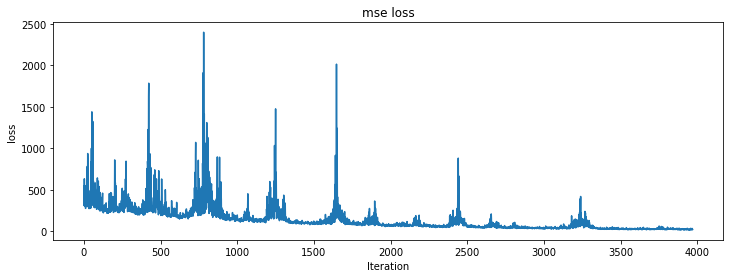

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize= (12,4))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('loss')
plt.title('mse loss')
plt.show()

Here, I used all set of two images in test set and produced their outputs and stored them all in a list called Z. 

After that for each middle real value of test set, I compared it to network value and saw where the argmin was.Consider an example: 

For example, for the 60th row in testing set, I compared the difference of the actual middle matrix with all values in the list Z and saw where this difference was minimum. If it was for example the Z[23], then it showed that network think that the first two column of the test set is responsible for producing the 60th middle matrix of the test_set. So, it would be wrong.

So what I did to measure the acuracy of the model is for each row in test set, I compared the output of the network for it and compared it to all real middle matrices and saw which one is closer to it. 

Thus, overall we give network an input from test set and we know from which rows it comes. Also, network predict a row responsible for it. Then if these two row indices match, the network has done its work correctly.
Remark: I could also do the following that for a middle matrix M, for each image X, compare Y that is most likely match for X for producing M and return best (X,Y) for it. But the way I do has exactly the same result as the function here is linear and can be written in different formats like I did. 

I write an actual prediction function in final part.

In [36]:
#no training, so,no grad required
Z=[]
with torch.no_grad():
    for i, (im1, im2, mid) in enumerate(testloader):
        #im1= im1/255
        im1= torch.from_numpy(np.array(im1, dtype='float32'))
        im1= im1.to(device)


        #im2= im2/255
        im2= torch.from_numpy(np.array(im2, dtype='float32'))
        im2= im2.to(device)

        #mid= mid/255
        mid= torch.from_numpy(np.array(mid, dtype='float32'))
        mid= mid.to(device)

        # forwad pass
        outputs= model(im1, im2)
        Z.append(outputs)
#producing a list of indices of the best pair (X,Y) that produces each Z[i] 
indices=[]
for j in range(len(test_data)):
    differs=[]
    for i in range(len(test_data)):
        l= torch.linalg.norm(Z[i].cpu()-test_data[j][2])
        differs.append(l)
    indices.append(np.argmin(differs))
    


In [ ]:
#computing acuracy of model by computing number of correct predictions out of all 
num_correct = 0
for i in range(len(test_data)):
    if indices[i]==np.arange(len(test_data))[i]:
        num_correct += 1
acc.append(num_correct / len(test_data))   
print('accuracy of model is:', num_correct / len(test_data))
print('number of correct prediction is:', num_correct,'out of overall:', len(test_data), 'test data')


accuracy of model is: 0.9049440847557386
number of correct prediction is: 3075 out of overall: 3398 test data


**Naive Prediction limited to only test set**

In this part, we have a predicting function that for each input, returns two images that the network think are responsible for producing this input. Of course this is only for test dataset. 

In [ ]:
def predicting(middle):
    differs=[]
    for i in range(len(test_data)):
        differs.append(torch.linalg.norm(Z[i].cpu()-middle))
    index= np.argmin(differs)
    print('your middle is:', middle)
    return('the first image is:',test_data[index][0], 'the second image is', test_data[index][1])

In [ ]:
# a test of how function works
predicting(test_data[208][2])

your middle is: [175.  173.5 176.5 ... 159.5 151.  140.5]


('the first image is:',
 array([201, 209, 226, ..., 197, 193, 181], dtype=uint8),
 'the second image is',
 array([149, 138, 127, ..., 122, 109, 100], dtype=uint8))

**Final part:**

**Real Prediction:**

In this section, I defined a final function that taking any middle matrix Z as an input, it returns both A and B that it things has created our Z.
In this stage, we can use any two pictures of our 1000 samples.

Building up Query input:
You can build up an input here to give it to 'real_prediction'. If you want to test it, just give the 'query' function, indices of first and second image of our sample of 1000 samples. then give the result to 'real_prediction' to see the results.

In [57]:
def query(i,j):
    a= torch.from_numpy(np.array(AS[i].flatten(), dtype='float32'))
    b= torch.from_numpy(np.array(AS[j].flatten(), dtype='float32'))
    c= (a+b)/2
    c= c.to(device)
    return c

The way this real_prediction function is work is that for any qurey point (middle matrix Z), for all set of possible images from our 1000 images, it computes all output of the model i.e. all outputs of (X,Y). Then for each of these binary combinations, it compute Norm(model(X,), Z) and find the argmin of this matrix. The indices of this matrix would be our desired outputs i.e. images A and B that are likely to have produced Z.

In [78]:
def real_prediction(Q):
    d= np.full((1000,1000), np.inf)
    for i in range(1000):

        a= torch.from_numpy(np.array(AS[i].flatten(), dtype='float32'))
        a= a.to(device)

        for j in np.arange(i, 1000):
            b= torch.from_numpy(np.array(AS[j].flatten(), dtype='float32'))
            b= b.to(device)

            o= model(a,b)
      
            d[i,j]= torch.linalg.norm(o-Q)
            #d.to(device)
    minimiser= np.ndarray.argmin(d)
    I= minimiser // 1000
    J= minimiser % 1000
    print('first image is:', I , 'th image of our 1000 sample')
    print('second image is:', J , 'th image of our 1000 sample')
    print('first image is:', S[I])
    print('second image is:', S[J])


In [79]:
#example
t= query(14, 601)
real_prediction(t)

first image is: 14 th image of our 1000 sample
second image is: 601 th image of our 1000 sample
first image is: [[[133 140 159]
  [132 139 158]
  [133 140 158]
  ...
  [134 140 159]
  [133 140 158]
  [133 140 158]]

 [[135 142 161]
  [134 141 160]
  [135 142 160]
  ...
  [135 142 161]
  [135 142 160]
  [135 142 160]]

 [[134 141 160]
  [133 140 159]
  [134 140 159]
  ...
  [134 141 159]
  [134 140 159]
  [134 140 158]]

 ...

 [[146 148 154]
  [143 145 152]
  [142 145 151]
  ...
  [128 128 134]
  [128 129 135]
  [113 116 123]]

 [[162 163 166]
  [161 162 165]
  [162 163 168]
  ...
  [111 113 123]
  [111 113 123]
  [110 113 123]]

 [[161 162 166]
  [160 161 165]
  [159 160 164]
  ...
  [129 132 141]
  [128 132 141]
  [128 132 141]]]


KeyError: ignored

In [80]:
#another example
r1= query(56, 888)
real_prediction(r1)

first image is: 56 th image of our 1000 sample
second image is: 888 th image of our 1000 sample
first image is: [[[0 0 2]
  [0 0 2]
  [0 0 2]
  ...
  [0 0 2]
  [0 0 2]
  [0 0 2]]

 [[0 0 2]
  [0 0 2]
  [0 0 2]
  ...
  [0 0 2]
  [0 0 2]
  [0 0 2]]

 [[0 0 2]
  [0 0 2]
  [0 0 2]
  ...
  [0 0 2]
  [0 0 2]
  [0 0 2]]

 ...

 [[0 0 2]
  [0 0 2]
  [0 0 2]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 2]
  [0 0 2]
  [0 0 2]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 2]
  [0 0 2]
  [0 0 2]
  ...
  [0 0 2]
  [0 0 2]
  [0 0 2]]]


KeyError: ignored